**Rappel du contexte de la mission**:<br>

L'organisation Nationale de lutte Contre le Faux-Monnayage a pour objectif la mise en place de méthodes d'identification des contrefaçons de billets en Euros.<br>

La mission confiée est la construction d'un algorithme qui, à partir d'un fichier de caractéristiques géométriques de billets, devra déterminer s'ils sont vrais ou faux.<br>

Les données fournies : un fichier "billets" de 1500 exemples de billets dont 500 faux, avec leurs 6 caractéristiques géométriques et étiquetés vrai/faux.<br>

**Démarche adpotée : le fichier de 1500 billets sera utilisé pour le paramétrage des algorithmes.<br>
Le langage choisi est Python.<br>
Les étapes seront les suivantes :**<br>

1. **Analyse Exploratoire des Données** sur les caractéristiques des billets.
> si données manquantes, seront imputées par Régression Linéaire<br>

2. Implémentation d'une **Régression Logistique**.
> matrice de confusion<br>
> rapport de classification<br>
> généralisation avec le fichier au format type : "billets_production".<br>

3. Implémentation d'un **K-means dans une optique prédictive**.
> matrice de confusions<br>
> rapport de classification<br>
> généralisation avec le fichier au format type : "billets_production".<br>

4. Implémentation d'un **K Nearest Neighbors** (pour bénéficier d'une tierce approche).
> matrice de confusion<br>
> rapport de classification<br>
> généralisation avec le fichier au format type : "billets_production".<br>

5. **Choix de l'algorithme de détection** 

6. **Détection des faux billets** dans un fichier fourni lors de la présentation.

## Import des librairies & paramètres Notebook
### Manipulation et traitement des données.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from algo_reg_functions import *
from carn_laurent_01_functions_042022 import *

C:\Users\Laurent Carn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Laurent Carn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Visualisation des données

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

### Options d'affichage du Notebook

In [3]:
######################################################################
# ## remarque importante : ##                                        #
#####                                                                #
# afin de faciliter l'accès aux différentes parties du notebook      #
# une table des matières a été créée avec l'extension                #
# # Jupyter-contrib Nbextensions - table of content #                #
# la table des matières est en en-tête du notebook                   #
# et également accessible sur le côté gauche en cliquant si besoin   #
# sur le dernier icône de la barre d'outils                          #
#####                                                                #
# ## merci de votre attention ##                                     #
#####                                                                #
######################################################################

# affichage de toutes les colonnes

#pd.set_option('max_columns', None)

# affichage des lignes

#pd.set_option('max_rows', None)

# largeur max des colonnes

pd.set_option('max_colwidth', None)

# les visualisations seront incluses dans le notebook
%matplotlib inline

## Chargement des données

In [4]:
billets = pd.read_csv('billets.csv', sep = ';')

## Analyse Exploratoire des Données "billets"

In [5]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
billets.shape

(1500, 7)

In [7]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


1500 observations (billets) décrits par 7 variables.<br>

1 catégorielle :
- is_genuine<br>
> vrai / faux billet

6 quantitatives :
- diagonal : diagonale en mm
- height_left : hauteur mesurée à gauche en mm
- height_right : hauteur mesurée à droite en mm
- margin_low : distance bord inférieur / image en mm
- margin_up : distance bord supérieur / image en mm
- length<br> : longueur en mm
> dimensions des billets

In [8]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.8 KB


types cohérents<br>

Données manquantes  : 37 valeurs null pour les margins_low

Sur indication de la "précédente collègue", Les 37 valeurs manquantes de la variable 'margin_low' vont être imputés **via une régression linéaire**.<br>

L'idée est de regarder dans un premier temps les corrélations linéaires entre les variables numériques.<br>
Si l'une des variables est plus corrélées que les autres à "margin_low", elle sera utilisée dans une **Régression Linéaire Simple**.<br>
Dans un second temps, les autres variables seront intégrées pour effectuer une **Régression Linéaire Multiple**.<br>
Les résultats de chacune des méthodes seront comparés, et celle qui propose les meilleurs résultats sera utilisée pour imputer les valeurs manquantes de "margin_low".

### Matrice de Corrélations des variables descriptives numériques des billets

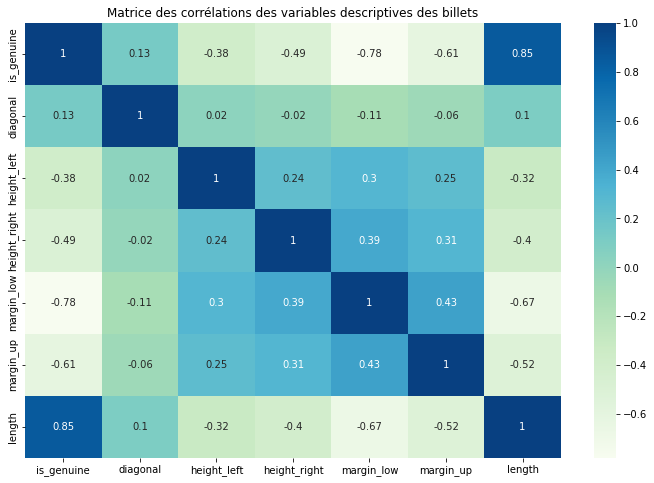

In [9]:
matrix_billets = billets.corr().round(2)
plt.rcParams["figure.figsize"] = [12,8]
sns.heatmap(matrix_billets, annot = True, cmap='GnBu')
plt.title('Matrice des corrélations des variables descriptives des billets')
plt.tight_layout
plt.show()

En ne considérant que les variables *numériques*, on constate que c'est la **variable "length"** qui est le plus *linéairement corrélée* à la variable "margin_low".<br>

Il  est possible de visualiser cette relation par un scatterplot :

### scatterplot margin_low en fonction de length

In [10]:
# dataframe avec uniquement valeurs numériques (ici la variable "is_genuine" ne sera pas transformée en 0/1)
## on supprime les lignes où margin_low est absente

billets_num = billets.drop('is_genuine', axis = 1).dropna()
billets_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1463 non-null   float64
 1   height_left   1463 non-null   float64
 2   height_right  1463 non-null   float64
 3   margin_low    1463 non-null   float64
 4   margin_up     1463 non-null   float64
 5   length        1463 non-null   float64
dtypes: float64(6)
memory usage: 80.0 KB


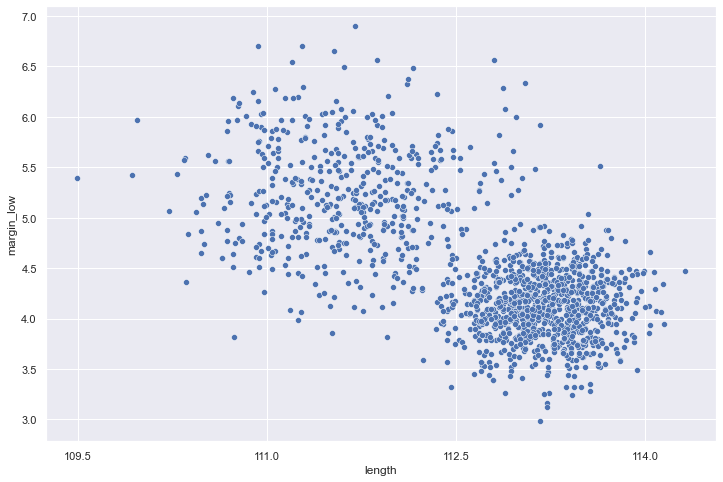

In [11]:
sns.set()

ax = sns.scatterplot(x='length', y='margin_low', data=billets_num)
ax.set(xlabel='length', ylabel='margin_low')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

### Régressions Linéaires

#### Régression Linéraire Simple.

Le scatterplot permet deux constats :
1. on peut avoir l'intuition de la droite qui matérialise la **corrélation linéaire négative** indiquée par la matrice de corrélation.
2. on constate **une dispersion importante des données**, qui aura un impact sur les résultats suivants.

##### Choix du modèle de Régression Linéaire Simple

In [12]:
X = billets_num.length
y = billets_num.margin_low

# le modèle smf.ols évite de rajouter une constante comme avec sm.OLS(y,X)
model_reg_s = smf.ols('y~X', data = billets_num)
result_reg_s = model_reg_s.fit()

##### Résultats de la Régression Linéaire Simple

In [13]:
print(result_reg_s.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sat, 07 May 2022   Prob (F-statistic):          8.98e-189
Time:                        00:28:09   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5960      1.670     36.881      0.0

Nous obtenons des statistiques sur les coefficients obtenus : leur valeur, leur écart-type, la statistique de test de Student, et la p-valeur (le test effectué sur le paramètre est ici le test de significativité : le paramètre vaut 0 versus le paramètre est différent de 0), ainsi que des statistiques sur le modèle général ($R^{2}$, $AIC$, etc...).

*Les p-valeurs sont inférieures à 5 %. À un niveau de test de 5 %, on rejette donc l'hypothèse selon laquelle le paramètre est égal à 0 : les paramètres sont donc significativement différents de 0.
Ici, on voit que la variable x (length) est significative.*

Quant au $R^{2}$, il est de l'ordre de 0.44. C'est faible, ce qui est attendu au vu du nuage de points obtenu.

Le warning sur le condition number ne peut pas provenir d'une multicolinéarité.

##### Visualiser la droite de régression

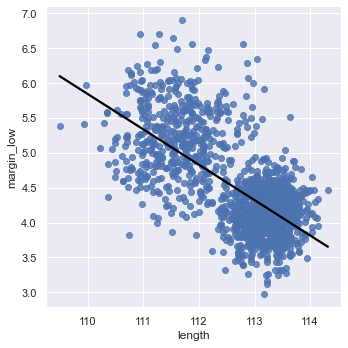

In [14]:
ax = sns.lmplot(x="length", y="margin_low", data=billets_num, ci=None, line_kws={'color':'black'})
ax.set(xlabel='length', ylabel='margin_low')
plt.show()

##### Visualiser les valeurs margin_low ajustées en fonction des valeurs du dataset

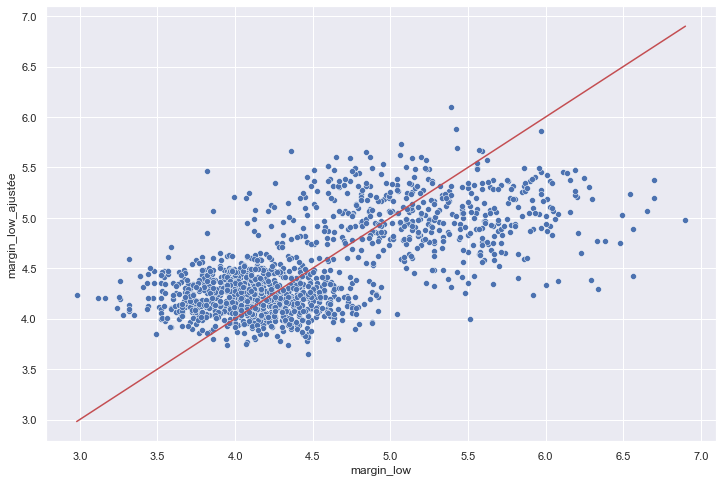

In [15]:
df_analyse = billets_num.copy()
df_analyse['margin_low_ajust_s'] = result_reg_s.predict()

X_plot = [df_analyse['margin_low'].min(), df_analyse['margin_low'].max()]

ax = sns.scatterplot(x="margin_low", y="margin_low_ajust_s", data=df_analyse)
ax.set(xlabel='margin_low', ylabel='margin_low_ajustée')
plt.plot(X_plot, X_plot, color='r')
plt.show()

Si le modèle était parfait,
les valeurs réelles et les valeurs ajustées seraient égales donc les points seraient alignés sur la droite d'équation $y=x$, soit la première bissectrice.

##### Distribution des résidus du modèle

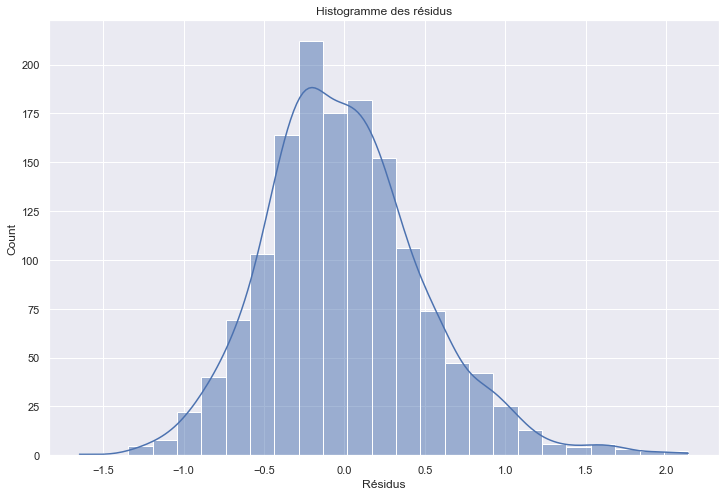

In [16]:
df_analyse['residu_s'] = result_reg_s.resid
# a partir des résidus, on dessine la distribution
sns.histplot(df_analyse['residu_s'], bins = 25, kde = True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

La distribution n'est pas centrée comme attendu. Elle est également bimodale.<br>
Ici, plutôt que d'accepter trop directement l'approximation normale de la distribution des résidus, on se propose de regarder les résultats et les résidus d'une **Régression Linéaire Multiple**.

#### Régression Linéaire Multiple

On intègre toutes les variables numériques du dataset.

L'objectif est de comparer les résultats avec la Régression Linéaire simple pour voir quelle méthode et la plus performante

##### Résultats Régression Linéaire Multiple

In [17]:
model_reg_m = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=billets_num)

result_reg_m = model_reg_m.fit()
print(result_reg_m.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 07 May 2022   Prob (F-statistic):          2.60e-202
Time:                        00:28:10   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

*Les p-valeurs sont inférieures à 5 %. À un niveau de test de 5 %, on rejette donc l'hypothèse selon laquelle le paramètre est égal à 0 : les paramètres sont donc significativement différents de 0.
Toutes les variables sont significatives.*<br>

On note également que les métriques R², log-vraissemblance et AIC sont meilleures que pour la Régression Linéaire Simple.<br>

Le warning sur le condition number pourrait provenir d'une multicolinéarité.

In [18]:
variables = result_reg_m.model.exog
VIF = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]
pd.DataFrame(VIF, billets_num.drop('margin_low', axis=1).columns.tolist()).rename(columns={0:'VIF'})

,VIF
diagonal,1.013613
height_left,1.138261
height_right,1.230115
margin_up,1.404404
length,1.576950


Les Variance Inflation Factors des variables sont < 5 => pas de colinéarité.

Le warning peut provenir de la différence d'ordre de grandeur dans les mesures.
On peut standardiser le dataframe et recommencer la Reg Lin multiple

##### Résultats de la Régression Linéaire Multiple apres standardisation

In [19]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler()

billets_std = billets_num.copy()

dim_billets = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']

billets_std[dim_billets] = std_scale.fit_transform(billets_std[dim_billets])

billets_std.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.488594,2.766807,3.173766,0.051286,-1.136982,0.177842
1,-1.634809,-2.241490,-0.806851,-1.078937,-0.704806,0.475692
2,2.393318,1.498039,-1.300571,-0.129549,-0.920894,0.555882
3,-1.962299,-0.405114,0.057159,-1.304982,-0.618370,0.956834
4,-0.750586,0.830266,-1.424001,-0.672057,1.412861,-0.154375


In [20]:
model_reg_m_std = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=billets_std)

result_reg_m_std = model_reg_m_std.fit()
print(result_reg_m_std.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 07 May 2022   Prob (F-statistic):          2.60e-202
Time:                        00:28:10   Log-Likelihood:                -1601.3
No. Observations:                1463   AIC:                             3215.
Df Residuals:                    1457   BIC:                             3246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.669e-15      0.019  -1.41e-13   

**Trois constats** :<br>

1. le warning sur le condition number a disparu.
2. Toutefois les metrics sont moins bons :
> le R² est très légèrement supérieur, ce qui n'est pas significatif compte-tenu du fait qu'il augmente naturellement avec le rajout de variables.<br>
> la log-vraissemblance est inférieure<br>
> incidemment, le critère d'Akaike est supérieur car calculé à partir de la log-vraissemblance.<br>
3. les variables restent toutes significatives<br>

Le choix se porte sur le modèle avec les données non-standardisées *(model_reg_m)* pour la suite de la caractérisation de la Régression Linéraire Multiple.

##### Test de White pour l'homoscédasticité

In [21]:
from statsmodels.stats.diagnostic import het_white
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

white_test = het_white(result_reg_m.resid,  result_reg_m.model.exog)

print(dict(zip(labels, white_test)))

{'Test Statistic': 109.86015196860276, 'Test Statistic p-value': 2.0828244990311458e-14, 'F-Statistic': 5.853731207797871, 'F-Test p-value': 4.974865092836885e-15}


Ici on pose l'hypothèse $H_0$ d'homoscédasticité (constance des variances des résidus) avec un seuil de significativité à 5%.<br>
La $p-value$ étant inférieure au seuil, on ne peut pas rejetter $H_0$ : <br>
Les résidus sont hétéroscédastiques : c'est un critère défavorable à l'application de la Régression Linéaire Multiple.

##### Visualiation des résidus

On peut tracer un scatterplot des résidus du modèle en fonction de la variable margin_low pour vérifier visuellement le caractère aléatoire des points.

In [22]:
df_analyse['residu_m'] = result_reg_m.resid

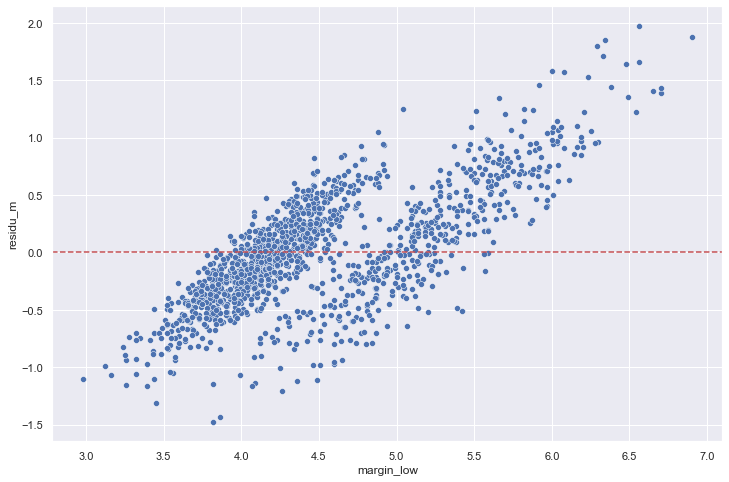

In [23]:
sns.scatterplot(data=df_analyse,x='margin_low',y='residu_m')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

pas de pattern simple pour autant le caractère aléatoire n'est pas confirmé.<br>

On peut regarder la distribution des résidus.

##### Normalité de la distribution des résidus

Notre dataset comprends moins de 2000 observations, on privilégie le test de Shapiro pour valider la distribution normale des résidus.

In [24]:
shapiro(result_reg_m.resid) # nb obs < 2000

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

Ici on pose l'hypothèse $H_0$ de normalité de la distribution des résidus avec un seuil de significativité à 5%.<br>
La $p-value$ étant inférieure au seuil, on rejette $H_0$ de normalité : <br>
La distribution des résidus n'est pas gaussienne.

Il est tout de même intéressant de tracer cette distribution, et de regarder le tracé de probabilité normale :

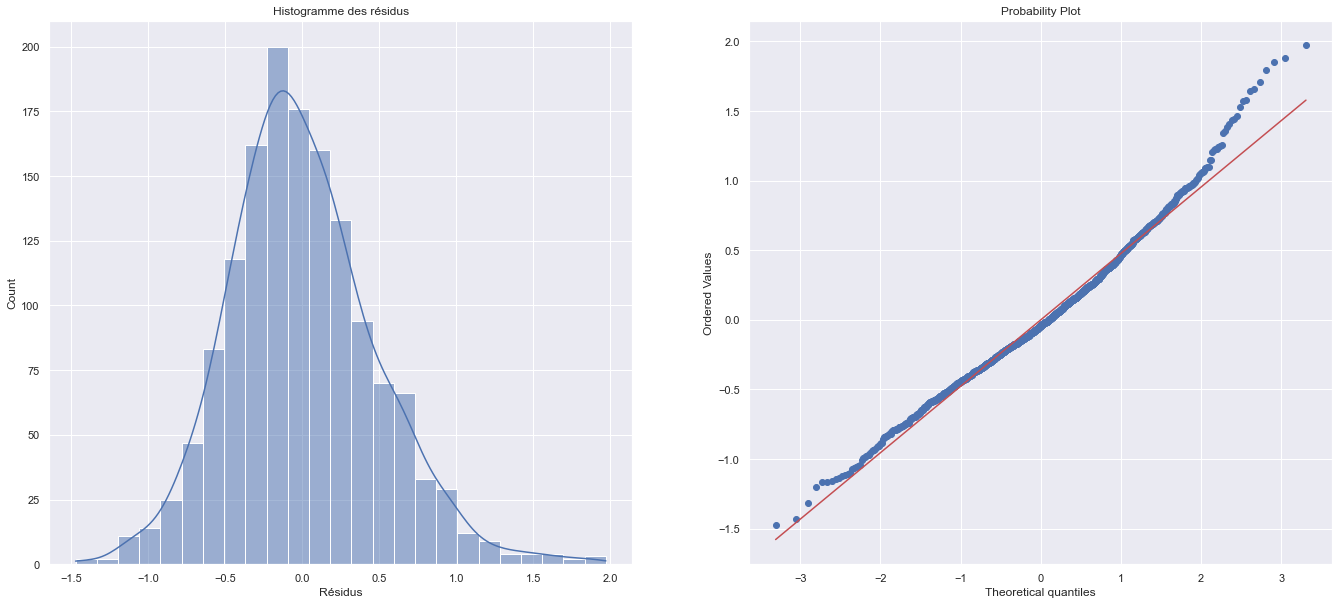

In [25]:
plt.rcParams["figure.figsize"] = [23,10]

plt.subplot(1,2,1)

sns.histplot(result_reg_m.resid, bins = 25, kde = True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')

plt.subplot(1,2,2)
_ =sp.stats.probplot(result_reg_m.resid,plot=plt.subplot(1,2,2))
plt.show()

La distribution des résidus a une allure gaussienne (centrée et relativement symétrique), mais n'est pas centrée en 0.<br>
Sur le tracé de probabilité normale, les points s'éloignent assez peu de la 1ère bissectrice en rouge qui correspond à la probabilité normale.<br>

Le nombre de données étant par ailleurs > 30, le choix est fait d'accepter l'approximation de normalité de la distribution des résidus.<br>

En conséquence, on considère ici que la régression linéaire multiple est applicable.

##### Choix du modèle final de Régression LInéaire

Le modèle de Régression Linéaire Multiple est applicable, et donne des résultats (métriques R², log-vraissemblance et AIC) meilleurs que la Régression Linéaire Simple.<br>
C'est donc "model_reg_m" notre modèle final.<br>

##### Prédiction des valeurs manquantes de "margin_low"

L'étape suivante consiste à prédire les valeurs manquantes de "margin_low" avec la méthode *.predict* à partir de "result_reg_m", dans laquelle sera passé le subset constitué des 37 lignes d'intérêt.

In [26]:
# subset
billets_cible_reg = billets[billets.margin_low.isna()]

# suppression de la colonne margin_low
billets_cible_reg = billets_cible_reg.drop('margin_low', axis = 1)
len(billets_cible_reg)

37

In [27]:
# prédiction des valeurs manquantes :

margin_low_prev_m = result_reg_m.predict(billets_cible_reg)
margin_low_prev_m

72      4.318525
99      4.393668
151     4.410457
197     4.319014
241     4.650617
251     3.803308
284     4.179736
334     4.127442
410     4.135034
413     4.160539
445     4.177420
481     3.768554
505     4.058764
611     4.298047
654     4.160607
675     4.094065
710     4.439846
739     4.470650
742     4.341643
780     4.080414
798     3.614306
844     4.371811
845     4.093621
871     4.249629
895     3.893748
919     3.746333
945     4.237415
946     4.710533
981     4.137780
1076    5.050277
1121    4.802145
1176    5.067584
1303    5.047570
1315    4.778967
1347    5.726993
1435    5.185862
1438    5.140043
dtype: float64

##### Imputation des valeurs trouvées par régression linéaire multiple

In [28]:
billets.loc[billets.margin_low.isna(), 'margin_low'] = result_reg_m.predict(billets)

In [29]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [30]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.8 KB


Les résultats de la régression linéaire (R² faible en particulier) et le fait que le nombre de lignes avec données manquantes ne représentent que 2,5% du dataset indiquent que la régression linéaire n'était pas forcément ici la méthode idéale pour traiter ces données manquantes<br>

C'est cette méthode qui est utilisée ici, en respect du déroulé attendu, toutefois une remarque finale sur ce point est proposé en fin de notebook.

### Corrélations entre les variables

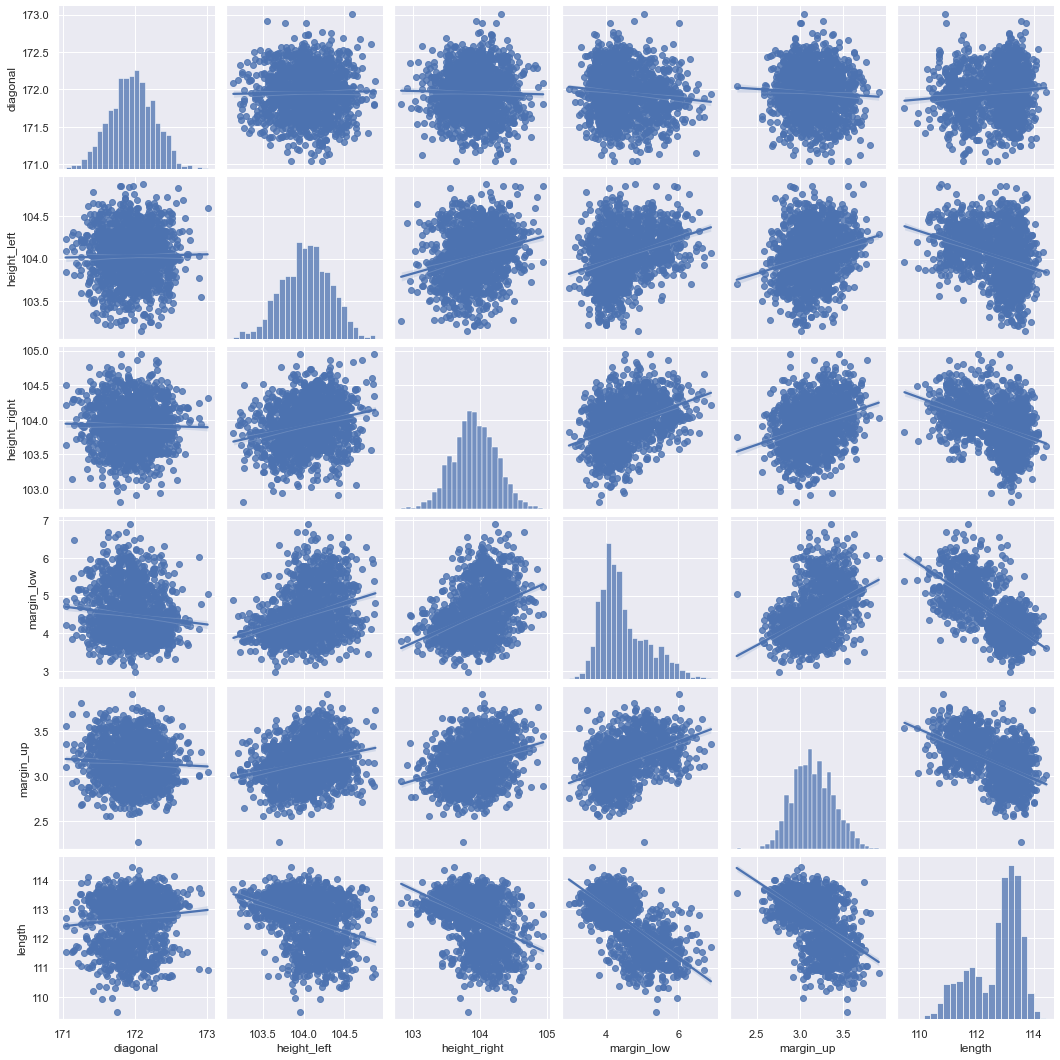

In [31]:
sns.pairplot(billets.drop('is_genuine', axis=1), kind = 'reg')#,hue = 'is_genuine'
plt.show()

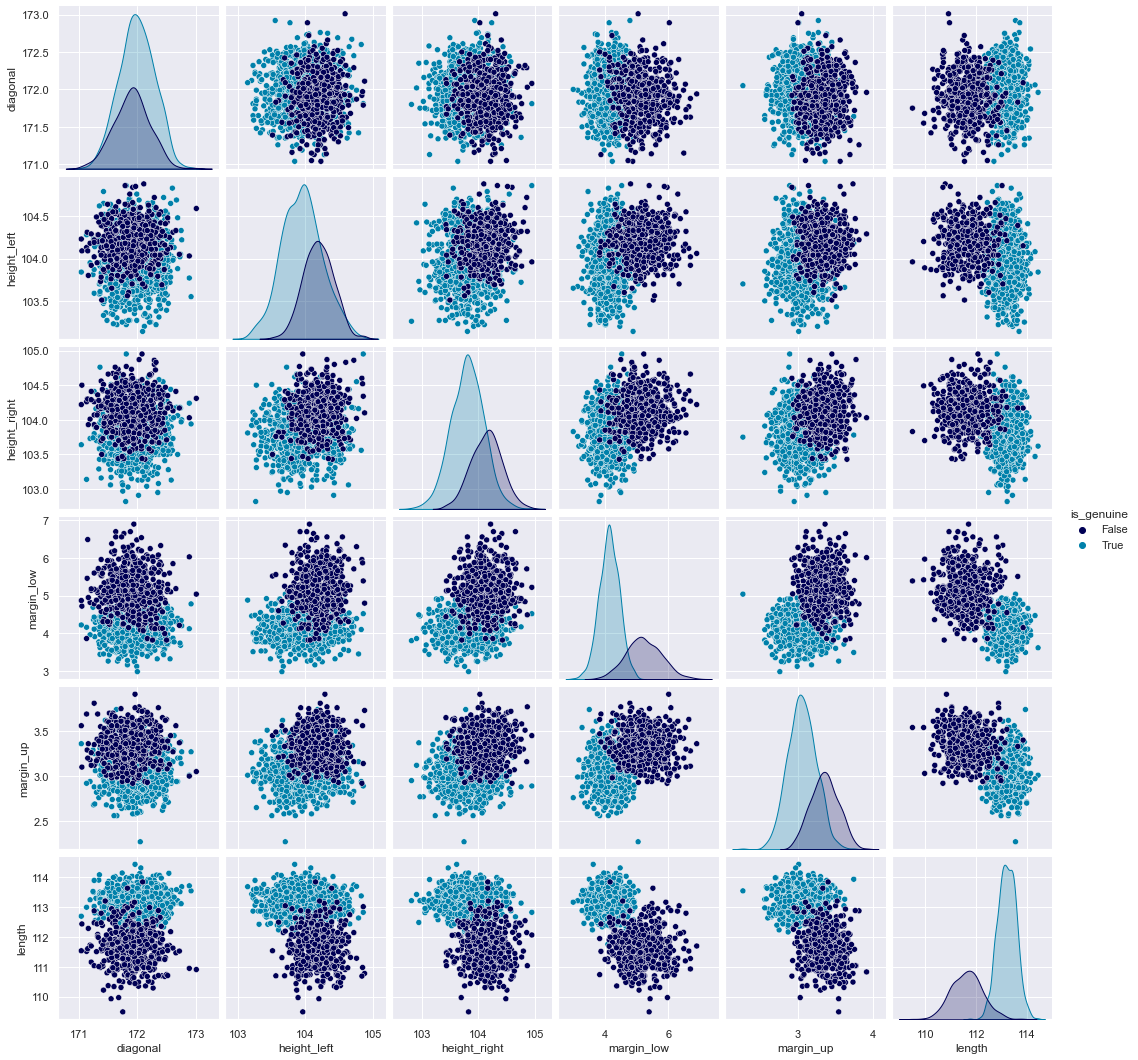

In [32]:
sns.pairplot(billets,hue = 'is_genuine', palette = 'ocean')
plt.show()

### Caractéristiques des billets en fonction de is_genuine

#### Proportions False / True

In [33]:
billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

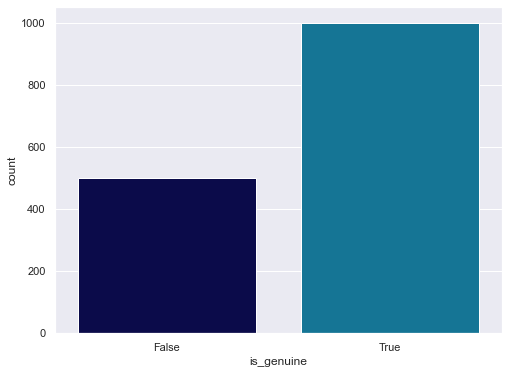

In [34]:
plt.rcParams["figure.figsize"] = [8,6]
sns.countplot(x='is_genuine', data = billets, palette = 'ocean')
plt.show()

In [35]:
count_false = len(billets[billets['is_genuine']==0])
count_true = len(billets[billets['is_genuine']==1])
pct_of_false = count_false/(count_false+count_true)
print("le pourcentage de faux billets est de", pct_of_false*100)
pct_of_true = count_true/(count_false+count_true)
print("le pourcentage de vrais billets est de ", pct_of_true*100)

le pourcentage de faux billets est de 33.33333333333333
le pourcentage de vrais billets est de  66.66666666666666


Ce ratio n'implique par une détection d'événements rares, pas d'oversampling sur les faux billets.

#### Moyennes des dimensions

In [36]:
dim_moyennes = billets.groupby('is_genuine').mean()
diff = dim_moyennes.diff().dropna()
dim_moyennes = pd.concat([dim_moyennes, diff])
dim_moyennes.index = ['True', 'False', 'diff des moyennes']
dim_moyennes

,diagonal,height_left,height_right,margin_low,margin_up,length
True,171.90116,104.19034,104.14362,5.214079,3.35016,111.63064
False,171.98708,103.94913,103.80865,4.118174,3.05213,113.20243
diff des moyennes,0.08592,-0.24121,-0.33497,-1.095905,-0.29803,1.57179


En tenant compte des ordres de grandeur des dimensions, on constate que les différences les plus importantes entre les moyennes des dimensions pour les faux et les vrais billets concernent :

- margin_low
- margin_up
- length
- height_right (dans une moindre mesure)<br>

Cela peut constituer une première piste à explorer pour différencier les faux billets des vrais.

#### Distributions des dimensions des billets en fonction de la variable catégorielle 'is_genuine'

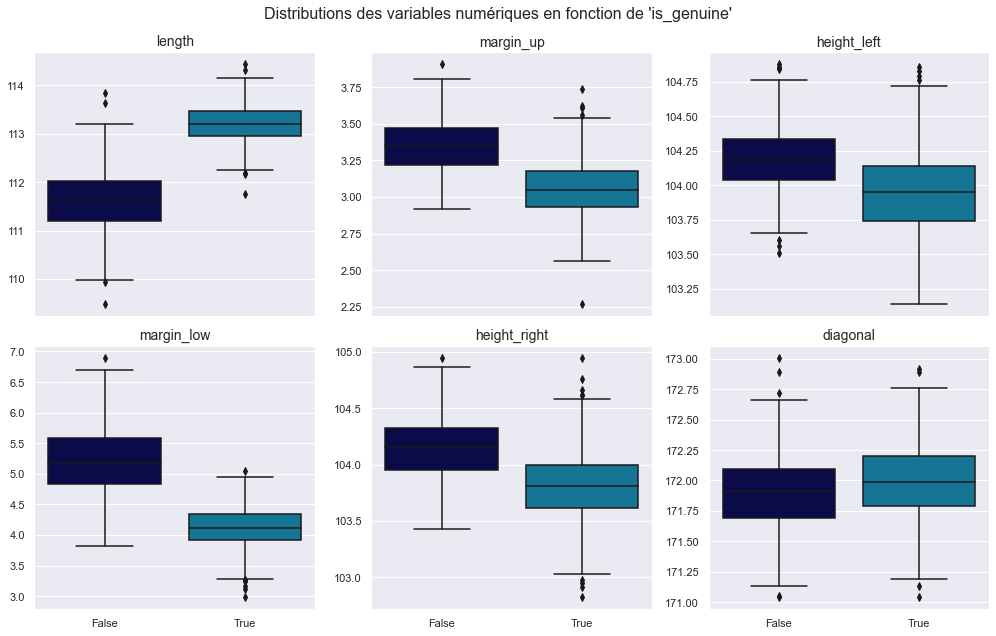

In [37]:
fig, axs = plt.subplots(2,3, sharex = True, sharey = False, figsize = (14,9))
fig.suptitle("Distributions des variables numériques en fonction de 'is_genuine'",
            fontsize = 16)

sns.boxplot(data = billets, x= 'is_genuine', y= 'length', palette = 'ocean', ax=axs[0,0])
axs[0,0].set_title('length', fontsize = 14)
sns.boxplot(data = billets, x= 'is_genuine', y= 'margin_up', palette = 'ocean', ax=axs[0,1])
axs[0,1].set_title('margin_up', fontsize = 14)
sns.boxplot(data = billets, x= 'is_genuine', y= 'margin_low', palette = 'ocean', ax=axs[1,0])
axs[1,0].set_title('margin_low', fontsize = 14)
sns.boxplot(data = billets, x= 'is_genuine', y= 'height_right', palette = 'ocean', ax=axs[1,1])
axs[1,1].set_title('height_right', fontsize = 14)
sns.boxplot(data = billets, x= 'is_genuine', y= 'height_left', palette = 'ocean', ax=axs[0,2])
axs[0,2].set_title('height_left', fontsize = 14)
sns.boxplot(data = billets, x= 'is_genuine', y= 'diagonal', palette = 'ocean', ax=axs[1,2])
axs[1,2].set_title('diagonal', fontsize = 14)

for ax in axs.flat:
    ax.set_ylabel('')
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

L'intuition précédente se confirme : "length", "margin_low", "margin_up", "height_right" semblent de bon prédicteurs pour la variable binaire "is_genuine". "Height_left" dans une moindre mesure, à confirmer. "diagonal" serait sans doute écartée.<br>
L'ACP est une approche intéressante pour confirmer.

### Analyse en Composantes Principales

In [38]:
# dataframe

billets_acp = billets.drop('is_genuine', axis = 1)

In [39]:
X_billets = billets_acp.values
X_billets.shape

(1500, 6)

In [40]:
# réduction et centrage des données :

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_billets)

In [41]:
# Calcul des composantes principales

from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

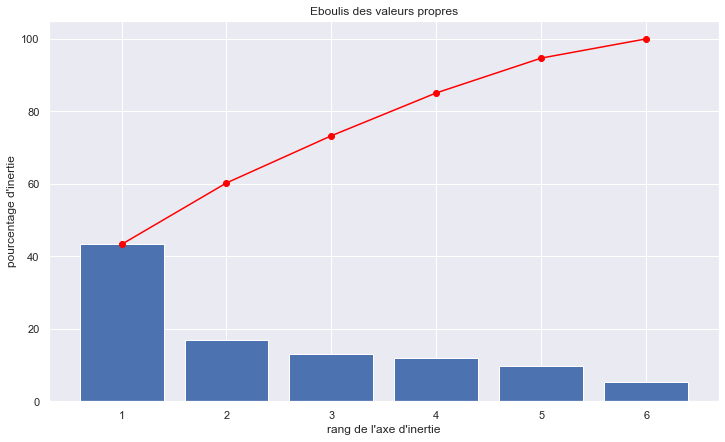

% de variance expliquée pour chaque composante : 
 [0.43288253 0.16956616 0.13025062 0.11824871 0.09602704 0.05302493]
la somme des % de variance expliquée vaut : 
 1.0
Sommes cumulées des % de variance expliquée : 
 [0.43288253 0.60244869 0.73269932 0.85094803 0.94697507 1.        ]


In [42]:
# Eboulis des valeurs propres + courbe de l'inertie cumulée

plt.rcParams["figure.figsize"] = [12,7]
display_scree_plot(pca)

# calcul du % de variance expliquée par chacune des composantes
# pca.explained_variance_ratio_

print('% de variance expliquée pour chaque composante : \n',pca.explained_variance_ratio_)
print('la somme des % de variance expliquée vaut : \n',pca.explained_variance_ratio_.sum())
print('Sommes cumulées des % de variance expliquée : \n',pca.explained_variance_ratio_.cumsum())

60 % de l'inertie totale est expliquée par les 2 premières composantes principales (33 % des vars synthétiques)

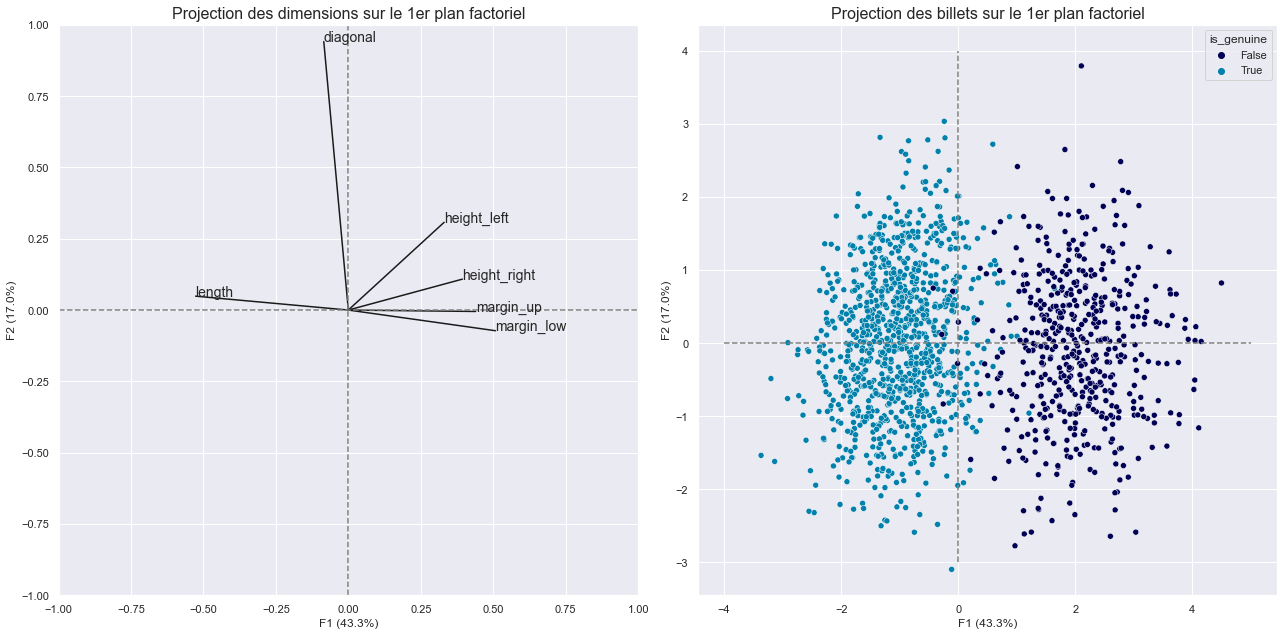

In [43]:
plt.rcParams["figure.figsize"] = [18,9]
pcs = pca.components_
X_projected = pca.transform(X_scaled)
plt.subplot(1,2,1)
for i, (x, y) in enumerate(zip(pcs[0,:], pcs[1,:])):
    # afficher un segment de l'origine au point (x,y)
    plt.plot([0,x], [0,y], color = 'k')
    # afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, billets_acp.columns[i], fontsize = '14')
    
# afficher la ligne horizontale y=0

plt.plot([-1,1], [0,0], color = 'grey', ls='--')

# afficher la ligne verticale x=0

plt.plot([0,0], [-1, 1], color = 'grey', ls='--')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('Projection des dimensions sur le 1er plan factoriel', fontsize=16)
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)))

plt.subplot(1,2,2)
sns.scatterplot (x=X_projected[:,0], y=X_projected[:,1],
            ## coloration en fct de la var is_genuine
            hue=billets.get('is_genuine'), palette = 'ocean')
plt.plot([-4, 5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-3, 4], color='grey', ls='--')
plt.title('Projection des billets sur le 1er plan factoriel', fontsize=16)
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)))
plt.tight_layout()
plt.show()

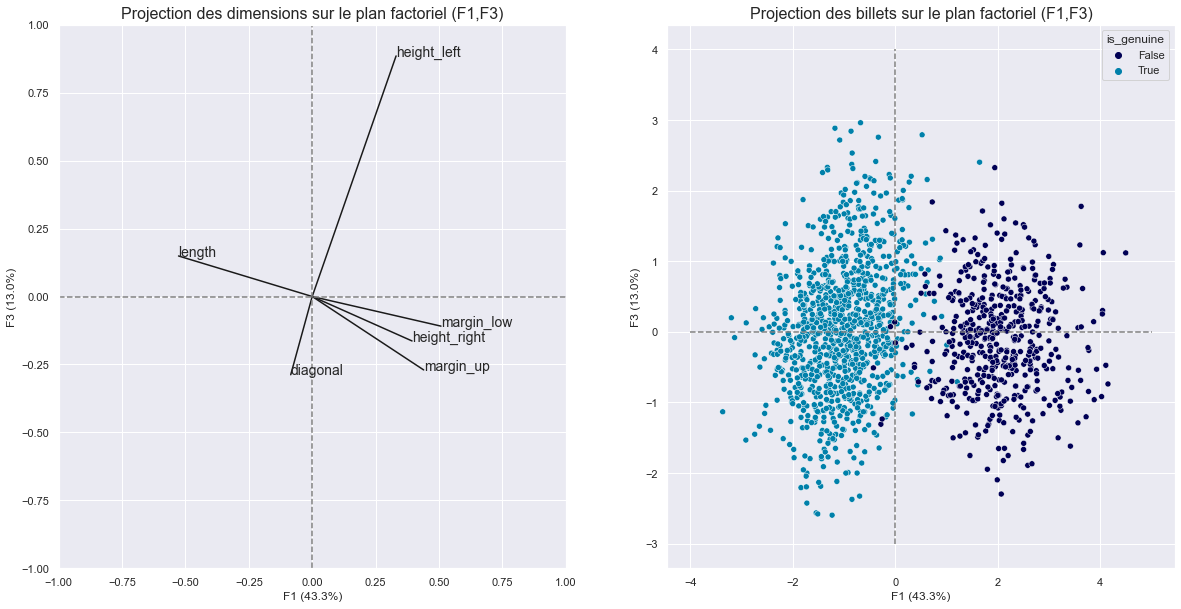

In [44]:
plt.rcParams["figure.figsize"] = [20,10]

plt.subplot(1,2,1)
for i, (x, y) in enumerate(zip(pcs[0,:], pcs[2,:])):
    # afficher un segment de l'origine au point (x,y)
    plt.plot([0,x], [0,y], color = 'k')
    # afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, billets_acp.columns[i], fontsize = '14')
    
# afficher la ligne horizontale y=0

plt.plot([-1,1], [0,0], color = 'grey', ls='--')

# afficher la ligne verticale x=0

plt.plot([0,0], [-1, 1], color = 'grey', ls='--')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('Projection des dimensions sur le plan factoriel (F1,F3)', fontsize=16)
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2+1, round(100*pca.explained_variance_ratio_[2],1)))

plt.subplot(1,2,2)
sns.scatterplot (x=X_projected[:,0], y=X_projected[:,2],
            ## coloration en fct de la var is_genuine
            hue=billets.get('is_genuine'), palette = 'ocean')
plt.plot([-4, 5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-3, 4], color='grey', ls='--')
plt.title('Projection des billets sur le plan factoriel (F1,F3)', fontsize=16)
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)), )
plt.ylabel('F{} ({}%)'.format(2+1, round(100*pca.explained_variance_ratio_[2],1)))

plt.show()

## Régression Logistique

### Sélection des variables significatives avec statsmodels

In [45]:
y = billets.is_genuine
X = billets.drop('is_genuine', axis = 1)

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.028471
         Iterations 11
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.955   
Dependent Variable: is_genuine       AIC:              97.4141 
Date:               2022-05-07 00:28 BIC:              129.2934
No. Observations:   1500             Log-Likelihood:   -42.707 
Df Model:           5                LL-Null:          -954.77 
Df Residuals:       1494             LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     11.0000                                    
---------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------
diagonal       -0.6396   0.7038 -0.9087 0.3635  -2.0191  0.7399
height_left    -2.0220   1.0384 -1.9472 0.0515  -4.0574  0.0133
height_right   -2.6201   0

In [46]:
y = billets.is_genuine
X = billets.drop(['is_genuine', 'diagonal'], axis = 1)

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.028750
         Iterations 11
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.955   
Dependent Variable: is_genuine       AIC:              96.2494 
Date:               2022-05-07 00:28 BIC:              122.8155
No. Observations:   1500             Log-Likelihood:   -43.125 
Df Model:           4                LL-Null:          -954.77 
Df Residuals:       1495             LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     11.0000                                    
---------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------
height_left    -2.4114   0.9613 -2.5086 0.0121  -4.2955 -0.5274
height_right   -2.9477   0.9412 -3.1320 0.0017  -4.7924 -1.1031
margin_low     -5.6541   0

### Implémentation avec SKlearn

**Etape Préliminaire : création des sets d'entraitement et de validation**<br>

Ici, *à l'exception de le suppression a posteriori de la variable non significative pour la régression logistique*, les deux sets seront communs aux trois algorithmes implémentés.

In [47]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [48]:
X = billets.drop(['is_genuine'], axis = 1)
y = billets.is_genuine

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8191)

In [50]:
# standardisation des données pour la régression logistique
X_train_logreg = X_train.drop('diagonal', axis=1)
X_test_logreg = X_test.drop('diagonal', axis=1)
scaler = StandardScaler()
X_train_logreg = scaler.fit_transform(X_train_logreg)
X_test_logreg = scaler.fit_transform(X_test_logreg)

# standardisation des données avec toutes les variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
X_train_logreg

array([[-0.09353678, -0.29772887,  2.84000431, -0.19292872, -0.6621821 ],
       [ 1.75245545, -1.09513868, -0.64644554,  1.21262312,  0.2851913 ],
       [-1.32419828, -0.88045142, -1.11841037,  0.64161768,  0.30829797],
       ...,
       [ 0.62434908,  0.19298486,  1.89607465,  1.56401108, -0.92790879],
       [ 0.65853413,  0.25432407, -0.40285079,  0.55377069,  1.1632447 ],
       [ 0.555979  ,  0.13164564,  1.37843581, -0.67608717,  0.20431796]])

In [52]:
X_train

array([[ 1.44091973, -0.09353678, -0.29772887,  2.84000431, -0.19292872,
        -0.6621821 ],
       [ 1.24503275,  1.75245545, -1.09513868, -0.64644554,  1.21262312,
         0.2851913 ],
       [-0.35471089, -1.32419828, -0.88045142, -1.11841037,  0.64161768,
         0.30829797],
       ...,
       [ 0.95120229,  0.62434908,  0.19298486,  1.89607465,  1.56401108,
        -0.92790879],
       [ 2.61624159,  0.65853413,  0.25432407, -0.40285079,  0.55377069,
         1.1632447 ],
       [-1.00766749,  0.555979  ,  0.13164564,  1.37843581, -0.67608717,
         0.20431796]])

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Instance Régression Logistique
model_logreg = LogisticRegression()
result_logreg = model_logreg.fit(X_train_logreg, y_train)
result_logreg

LogisticRegression()

In [54]:
print('L\'exactitude du classificateur de la régression logistique sur le set d\'entrainement: {:.2f}'.format(
    result_logreg.score(X_train_logreg, y_train)))

L'exactitude du classificateur de la régression logistique sur le set d'entrainement: 0.99


### Prédiction des résultats et calcul de l'exactitude

In [55]:
y_pred = result_logreg.predict(X_test_logreg)
print('L\'exactitude du classificateur de la régression logistique sur le set de validation: {:.2f}'.format(
    result_logreg.score(X_test_logreg, y_test)))

L'exactitude du classificateur de la régression logistique sur le set de validation: 0.99


### Matrice de Confusion

In [56]:
from sklearn.metrics import confusion_matrix
cm_reglog =  confusion_matrix(y_test, y_pred)

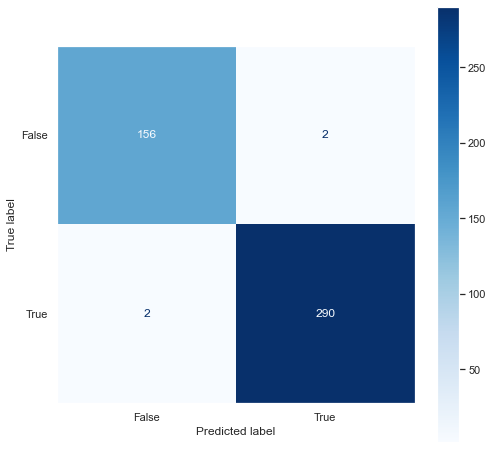

In [57]:
plt.rcParams["figure.figsize"] = [8,8]
disp = sk.metrics.ConfusionMatrixDisplay(cm_reglog, display_labels = model_logreg.classes_)
disp.plot(cmap = 'Blues')
plt.grid(False)
plt.show()

### Rapport de Classification

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       158
        True       0.99      0.99      0.99       292

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### ROC - AUC

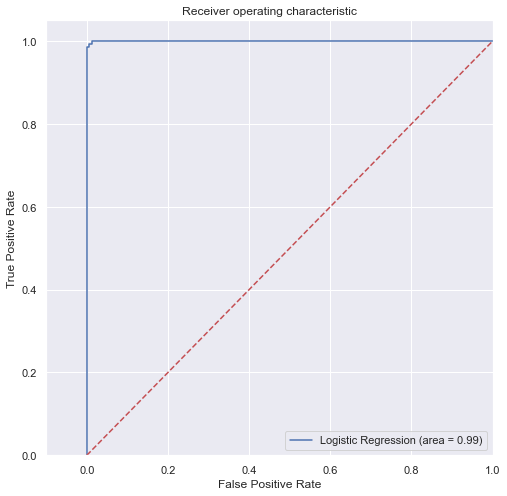

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, result_logreg.predict(X_test_logreg))
fpr, tpr, thresholds = roc_curve(y_test, result_logreg.predict_proba(X_test_logreg)[:,1])
plt.rcParams["figure.figsize"] = [8,8]
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Généralisation de la Régression Logistique sur l'échantillon de test "billets_prod"

#### Mise en forme du fichier pour l'adapter au format attendu par le modèle

In [60]:
billets_prod = pd.read_csv('billets_production.csv', sep = ',')
billets_prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [61]:
# on passe id en index
billets_prod = billets_prod.set_index('id')

In [62]:
# le modèle logreg a été implémenté en supprimant la variable non significative "diagonal"
X_cible = billets_prod.drop(['diagonal'], axis=1)

In [63]:
# le modèle a été implémenté avec données standardisées => il faut scaler X_cible

scaler_cible_reglog = StandardScaler()
scaler_cible_reglog.fit(X_cible)
X_cible = scaler_cible_reglog.transform(X_cible)

#### Prédiction sur l'échantillon de test

In [64]:
y_cible = result_logreg.predict(X_cible)

In [65]:
y_cible

array([False, False, False,  True,  True])

### Restitution du fichier enrichi

#### Résultat de la détection

In [66]:
billets_prod_reglog = billets_prod.copy()
billets_prod_reglog['is_genuine'] = y_cible
billets_prod_reglog

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True


#### Probabilité du résultat pour chaque détection

In [67]:
proba_log_reg = result_logreg.predict_proba(X_cible).round(2)
proba_log_reg

array([[0.95, 0.05],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [68]:
result_logreg.classes_

array([False,  True])

In [69]:
proba_log_reg[:,0]

array([0.95, 0.99, 0.99, 0.  , 0.  ])

In [70]:
billets_prod_reglog['proba_billet_faux'] = proba_log_reg[:,0].round(2)
billets_prod_reglog['proba_billet_vrai'] = proba_log_reg[:,1].round(2)

In [71]:
billets_prod_reglog

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,proba_billet_faux,proba_billet_vrai
id,,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,0.95,0.05
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,0.99,0.01
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,0.99,0.01
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,0.00,1.00
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,0.00,1.00


## K-means

### Clustering du dataset complet

Le nombre de clusters est connu et correspond aux classes 'vrai' et 'faux', soit 2<br>
Pour le K-means, ce sont les données standardisées "X_scaled" de l'ACP en partie 3.5 qui sont utilisées.

In [113]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités = nombre de classes possibles ('vrai' et 'faux')
n_clust = 2

# Clustering par K-means
km_full = KMeans(n_clusters=n_clust, random_state = 8191, n_init = 80)
km_full.fit(X_scaled)

# Récupération des clusters attribués à chaque individu

km__full_clusters = pd.Series(km_full.labels_).apply(lambda x:x == 0)*1


### Visualisation des clusters et des centroïdes sur le premier plan factoriel de l'ACP

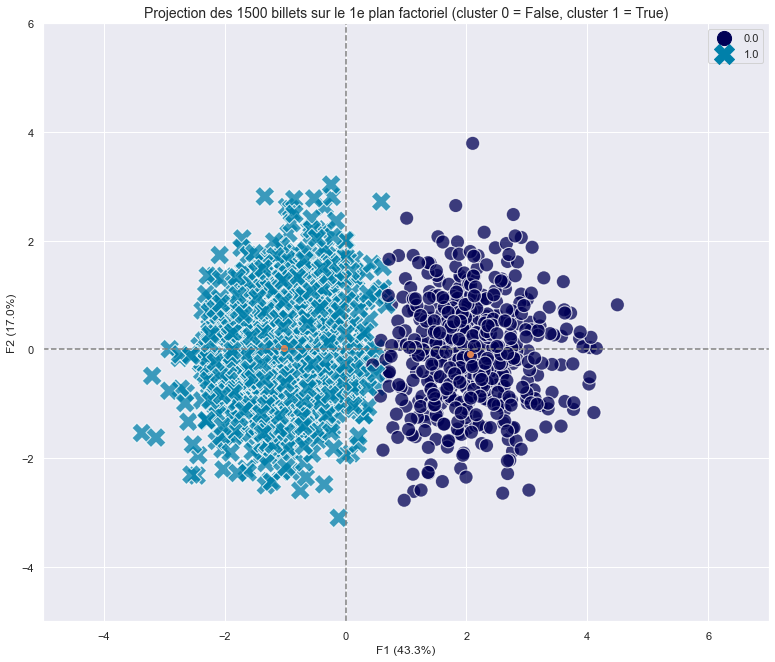

In [115]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
fig = plt.figure(figsize = [13,11])
gr1=sns.scatterplot(x=X_projected[:, 0], y=X_projected[:, 1],
                hue= km__full_clusters.astype(float),
               style = km__full_clusters.astype(float),
                size = km__full_clusters.astype(float),
               palette = 'ocean',
               sizes =(400,200), alpha = 0.75)
plt.xlim([-5,7])
plt.ylim([-5,6])
plt.title("Projection des {} billets sur le 1e plan factoriel (cluster 0 = False, cluster 1 = True)".format(X_projected.shape[0]),
         fontsize=14)
plt.plot([-5, 7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-5, 6], color='grey', ls='--')
centroids = km_full.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)))

plt.show()

### Entrainement du K-means

In [74]:
km = KMeans(n_clusters=2, random_state = 8191, n_init = 80)
km.fit(X_train)

KMeans(n_clusters=2, n_init=80, random_state=8191)

### Prédiction des résultats sur le set de validation et Matrice de confusion

In [75]:
# prédiction
y_pred_km = km.predict(X_test)

In [76]:
confusion_matrix_km = confusion_matrix(y_test, y_pred_km)
print(confusion_matrix_km)

[[  3 155]
 [291   1]]


La matrice de confusion des résultats du K-means semble "inversée" comparée à celle de la Régression Logistique.<br>

On peut mettre en regard les labels des clusters du set de validation avec ceux attribués par K-means :

In [77]:
pd.crosstab(y_test , y_pred_km, margins = True)

col_0,0,1,All
is_genuine,,,
False,3,155,158
True,291,1,292
All,294,156,450


Ici K-means a attribué le label 0 au cluster 'True' et 1 au cluster 'False'.<br>
On inverse les labels pour réaffecter le label 1 au cluster 'True' et 0 au cluster 'False', puis on recalcule la matrice de confusion :

#### Matrice de confusion mise à jour

In [78]:
y_pred_inv = pd.Series(y_pred_km).apply(lambda x:x == 0) * 1

In [79]:
cm_km = confusion_matrix(y_test, y_pred_inv)

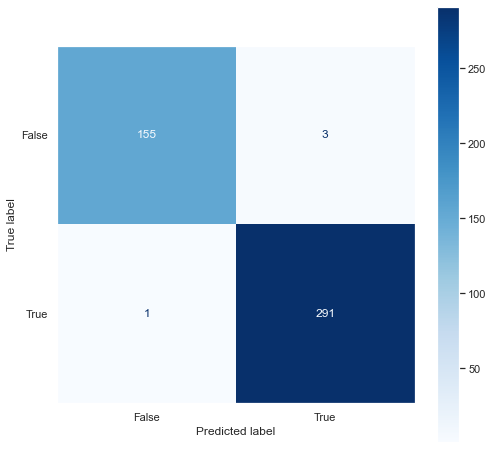

In [80]:
plt.rcParams["figure.figsize"] = [8,8]
disp2 = sk.metrics.ConfusionMatrixDisplay(cm_km, display_labels = (['False', 'True']))
disp2.plot(cmap = 'Blues')
plt.grid(False)
plt.show()

### Métriques de la prédiction du K-means

#### Exactitude

In [81]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [82]:
print('L\'exactitude du K-means sur le set de validation est de : {:.2f}'.format(
    accuracy_score(y_test, y_pred_inv)))

L'exactitude du K-means sur le set de validation est de : 0.99


#### Rapport de Classification

In [83]:
print(classification_report(y_test, y_pred_inv))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       158
        True       0.99      1.00      0.99       292

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### Généralisation du K-means sur l'échantillon de test "billets_production"

#### Mise en forme du fichier au format attendu par le modèle

In [84]:
billets_prod = pd.read_csv('billets_production.csv', sep = ',')
billets_prod = billets_prod.set_index('id')
# l'algorithme a été entrainé avec des données standardisées
## standardisation des données de l'échantillon
billets_prod_km_scaled = StandardScaler().fit_transform(billets_prod)

#### Prédiction sur l'échantillon de test

In [85]:
X_cible_km = billets_prod_km_scaled
y_cible_km = km.predict(X_cible_km)
# pour mémoire, K-means attribue le label 0 au cluster 'True', et 1 au cluster 'False'
## on inverse les labels pour être en cohérence avec la norme établie
y_cible_km_inv = np.array(pd.Series(y_cible_km).apply(lambda x:x == 0) * 1)

In [86]:
y_cible_km_inv

array([0, 0, 0, 1, 1])

### Restitution du fichier enrichi

#### Résultat de la détection

In [87]:
billets_prod_km = billets_prod.copy()
billets_prod_km['is_genuine'] = y_cible_km_inv
billets_prod_km

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,0
A_2,171.87,104.17,104.13,6.00,3.31,112.09,0
A_3,172.00,104.58,104.29,4.99,3.39,111.57,0
A_4,172.49,104.55,104.34,4.44,3.03,113.20,1
A_5,171.65,103.63,103.56,3.77,3.16,113.33,1


## K Nearest Neighbours

Le paramètre principal de notre KNN est le "n_neighbors".<br>
Afin de trouver le k = "n_neighbors" optimal, on va utiliser GridSearchCV avec le cadre suivant :

- un intervalle pour k entre 5 et 50 voisins
- une validation croisée en divisant le dataset en 5 folds
- le k sera optimisé pour la meilleure valeur de la métrique 'accuracy'

GridSearchCV va itérer le model fitting sur 5 folds du set d'entrainement pour chaque k de l'intervalle défini et restituera le k qui obtient le meilleur score d'accuracy.

### Recherche du "n_neighbors" optimal avec GridSearchCV

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(5, 50))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   11.3s finished


In [90]:
print('le nombre de voisins optimal est : ',grid_search.best_params_)

le nombre de voisins optimal est :  {'n_neighbors': 9}


In [91]:
accuracy = grid_search.best_score_ *100
print("Le score d'exactitude pour le set d'entrainement avec optimisation est de : {:.2f}%".format(accuracy))

Le score d'exactitude pour le set d'entrainement avec optimisation est de : 99.05%


### Prédiction des résultats sur le set de validation

In [92]:
knn = KNeighborsClassifier(n_neighbors=9)

fitknn = knn.fit(X_test, y_test)

y_knn_pred=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test, y_knn_pred)*100

print("L\'exactitude du KNN pour le set de validation est de  : {:.2f}%".format(test_accuracy))

L'exactitude du KNN pour le set de validation est de  : 99.11%


### Matrice de Confusion

In [93]:
confusion_matrix_knn = confusion_matrix(y_test, y_knn_pred)
print(confusion_matrix_knn)

[[155   3]
 [  1 291]]


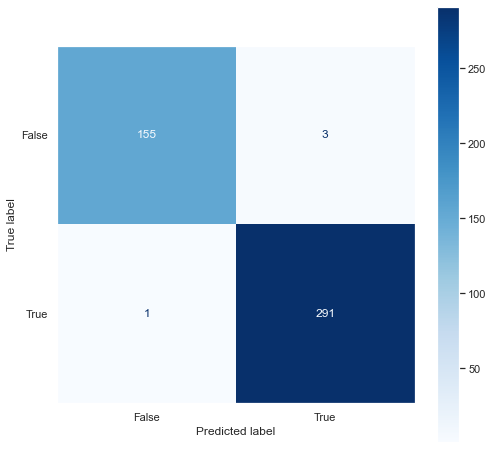

In [94]:
plt.rcParams["figure.figsize"] = [8,8]
disp3 = sk.metrics.ConfusionMatrixDisplay(confusion_matrix_knn, display_labels = ['False', 'True'])
disp3.plot(cmap = 'Blues')
plt.grid(False)
plt.show()

### Rapport de Classification

In [95]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       158
        True       0.99      1.00      0.99       292

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### Généralisation du KNN sur l'échantillon de test "billets_production"

#### Mise en forme du fichier au format attendu par le modèle

In [96]:
billets_prod = pd.read_csv('billets_production.csv', sep = ',')
billets_prod_knn = billets_prod.copy()

In [97]:
# on passe id en index
billets_prod_knn = billets_prod.set_index('id')

In [98]:
X_cible_knn = billets_prod_knn

In [99]:
# standardisation des données de l'échantillon
knn_scaler_cible = StandardScaler()
knn_scaler_cible.fit(X_cible_knn)
X_cible_knn = knn_scaler_cible.transform(X_cible_knn)

#### Prédiction sur l'échantillon de test

In [100]:
y_cible_knn = knn.predict(X_cible_knn)

In [101]:
y_cible_knn

array([False, False, False,  True,  True])

### Restitution du fichier enrichi

#### Résultat de la détection

In [102]:
billets_prod_knn['is_genuine'] = y_cible_knn
billets_prod_knn

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True


#### Probabilité pour chaque détection

In [103]:
proba_knn = knn.predict_proba(X_cible_knn)
proba_knn

array([[0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [104]:
billets_prod_knn['proba_billet_faux'] = proba_knn[:,0].round(2)
billets_prod_knn['proba_billet_vrai'] = proba_knn[:,1].round(2)
billets_prod_knn

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,proba_billet_faux,proba_billet_vrai
id,,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,0.89,0.11
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,1.00,0.00
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,1.00,0.00
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,0.00,1.00
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,0.00,1.00


## Choix de l'algorithme

**Détection des faux billets lors de la généralisation**<br>

Les trois algorithme détectent les 3 mêmes faux billets **A_1**, **A_2** et **A_3**.<br>

**Exactitude sur le set de validation**<br>

Les trois algorithmes obtiennent un score de **99%**.<br>

**Recall sur la classe 'False'**<br>

L'intérêt est de détecter tous les faux billets. Prédire qu'un billet appartient à la classe "False" est bien l'événement attendu dans le cadre de la détection de fausse monnaie.<br>

La **Régression Logistique** obtient un score de **99%**<br>
Les deux autres algorithmes obtiennent **98%**<br>

**Précision sur la classe 'False'**<br>

Lorsqu'un faux billet est détecté, quel est le ratio de billets vraiment faux ? (combien de fois la prédiction est-elle correcte?)<br>

Les trois algorithmes obtiennent un score de **99%**<br>

**Précision sur la classe 'True'**<br>

Lorsqu'un billet est détecté vrai, quel est le ratio de billets effectivement vrais ? Dans le cadre de la détection, on peut chercher à minimiser l'événement "faux billet détecté vrai".<br>

Les trois algorithme obtiennent un score de **99%**<br>

Les métriques sont très bonnes pour les trois algorithmes, en l'état on peut se fonder sur la **meilleure performance de la Régression Logistique sur le recall de la classe 'False' pour porter notre choix sur cette dernière**.

## Détection des faux billets sur fichier fourni pendant la présentation

### Création de la fonction de détection

In [105]:
# Régression Logistique
def detection_faux_billets_lr(billets_prod):
    ## mise en forme attendue par l'algorithme
    billets_prod = billets_prod.set_index('id')
    X_cible = billets_prod.drop(['diagonal'], axis=1)
    ## standardisation des données du fichier à contrôler
    scaler_cible = StandardScaler()
    scaler_cible.fit(X_cible)
    X_cible = scaler_cible.transform(X_cible)
    ## détection des faux billets
    y_cible = result_logreg.predict(X_cible)
    ## probabilités sur les résultats
    proba_log_reg = result_logreg.predict_proba(X_cible).round(2)
    ## mise en forme du fichier qualifié
    billets_prod['is_genuine'] = y_cible
    billets_prod['proba_billet_faux'] = proba_log_reg[:,0].round(2)
    billets_prod['proba_billet_vrai'] = proba_log_reg[:,1].round(2)
    # restitution
    return billets_prod

### Chargement du fichier à contrôler

In [106]:
# le nom du fichier sera remplacé pendant la soutenance par le nom du fichier fourni si différent de
# 'billets_production.csv'

billets_prod = pd.read_csv('billets_production.csv', sep = ',')

### Détection et restitution du fichier qualifié

In [107]:
detection_faux_billets_lr(billets_prod)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,proba_billet_faux,proba_billet_vrai
id,,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,0.95,0.05
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,0.99,0.01
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,0.99,0.01
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,0.00,1.00
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,0.00,1.00


## Pour aller plus loin

**Remarques finales sur la Régression Linéaire** :<br>

Comme proposé à l'issue de la Régression Linéaire Multiple, et en utilisant le même code que pour le présent notebook, une comparaison entre les résultats des trois algorithmes implémentés a été faite avec deux autres méthodes de traitment des données manquantes :

**Avec une simple imputation par la moyenne de la variable "margin_low"**<br>

Les résultats obtenus, en particulier les matrices de confusion et les rapports de classification, sont **exactement les mêmes qu'en imputant les données manquantes par Régression Linéaire Multiple**.<br>

**En supprimant les 37 billets pour lesquels la donnée "margin_low" est manquante**<br>

Les différence relevées :<br>

*sur la régression logistique*:<br>
- la variable 'height_left' devient non-significative comme 'diagonal' lors de la sélection des variables via statsmodels
- le recall sur la classe 'False' est légèrement moins bon<br>

*sur le K-means*:<br>
- même constat sur le recall de la classe 'False': le K-means est moins performant<br>

*sur le KNN*:<br>
- même constat sur le recall de la classe 'False'.

Dnas ce cas, la Régression Logistique et le K-means obtiennent les mêmes scores dans le rapport de classification, et c'est le KNN qui aurait été préféré pour sa meilleure performance sur la précision de la classe 'False'.<br>

**En conclusion**<br>

Nonobstant ces considérations, **les algorithmes détectent les mêmes faux billets quelle que soit la méthode de traitement des données manquantes choisie**. Le but fixé est donc atteint quelle que soit la méthode adoptée pour le traitement des données manquantes.<br>

Le présent contexte des données fournies et des choix faits pour les algorithmes et leur paramétrage et entrainement souligne simplement le gain de temps et de code potentiel à performance égale en préférant l'imputation par la moyenne à la régression linéaire pour le traitement des données manquantes.<br>

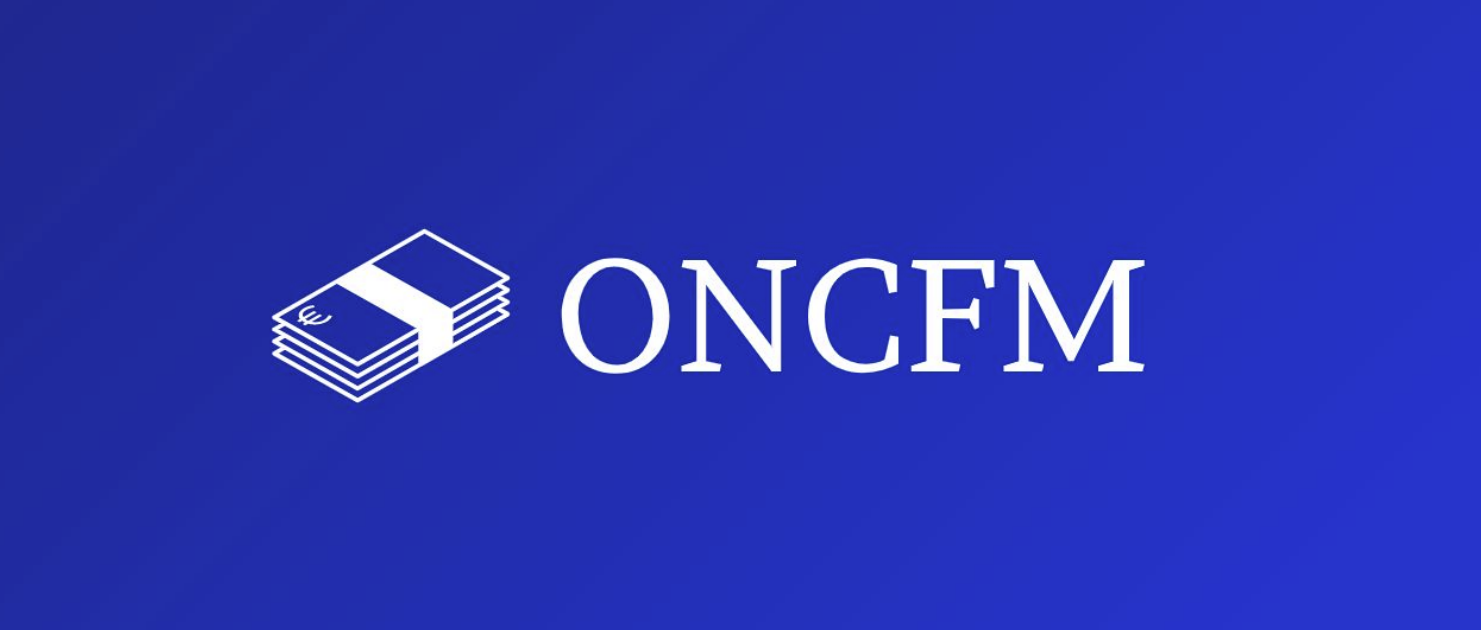